# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy import stats
from scipy.stats import linregress
from datetime import datetime 
# !pip install citipy

# Import API key
from api_keys import weather_api_key
from api_keys import g_key
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

598

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:


maxTempList=[]
humidityList= []
cloudList=[]
windspeedList=[]
countryList=[]
datesList=[]
latsList=[]
lngsList=[]
cityNameList=[]
x=0

for city in cities:
    units = "imperial"
    url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&units={units}&appid={weather_api_key}"
#     print(url)
    response = requests.get(url)
#     print(response.status_code)
    try:
        response.status_code == 200
        data = response.json()

        maxtemp = data["main"]["temp_max"]
        humidity = data["main"]["humidity"]
        country = data["sys"]["country"]
        windspeed = data["wind"]["speed"]
        cloud = data["clouds"]["all"]
        lat2= data["coord"]["lat"]
        lng2= data["coord"]["lon"]
        date = datetime.today().strftime('%m-%d-%Y %M:%S')


        latsList.append(lat2)
        lngsList.append(lng2)
        datesList.append(date)
        maxTempList.append(maxtemp)
        humidityList.append(humidity)
        countryList.append(country)
        windspeedList.append(windspeed)
        cloudList.append(cloud)
        cityNameList.append(city)
            
    except Exception as e:
        print(f"Exception on {city} at{datetime.today().strftime('%m-%d-%Y %M:%S')}: {e}...skipping")
        print(url)
    time.sleep(1)
    x+=1
    print(f"Processing Results #{x} for {city}")
    
      

Processing Results #1 for cherskiy
Processing Results #2 for chokurdakh
Processing Results #3 for punta arenas
Processing Results #4 for atuona
Processing Results #5 for jamestown
Processing Results #6 for mar del plata
Processing Results #7 for taksimo
Processing Results #8 for albany
Processing Results #9 for ushuaia
Processing Results #10 for iqaluit
Processing Results #11 for mecca
Exception on labutta at11-01-2020 46:35: 'main'...skipping
http://api.openweathermap.org/data/2.5/weather?q=labutta&units=imperial&appid=9386540e62857b40ff4e11f898784498
Processing Results #12 for labutta
Exception on vaitupu at11-01-2020 46:37: 'main'...skipping
http://api.openweathermap.org/data/2.5/weather?q=vaitupu&units=imperial&appid=9386540e62857b40ff4e11f898784498
Processing Results #13 for vaitupu
Processing Results #14 for upernavik
Processing Results #15 for morondava
Processing Results #16 for hithadhoo
Processing Results #17 for quixada
Processing Results #18 for hermanus
Exception on longla

Processing Results #154 for ormara
Processing Results #155 for port hedland
Processing Results #156 for brae
Processing Results #157 for hobart
Processing Results #158 for nacala
Processing Results #159 for castro
Processing Results #160 for longyearbyen
Processing Results #161 for onda
Processing Results #162 for qaanaaq
Processing Results #163 for szczecinek
Processing Results #164 for sur
Processing Results #165 for katsuura
Processing Results #166 for podgornoye
Processing Results #167 for vangaindrano
Processing Results #168 for yenagoa
Processing Results #169 for san cristobal
Processing Results #170 for masuguru
Processing Results #171 for saint-joseph
Processing Results #172 for luena
Exception on burica at11-01-2020 49:37: 'main'...skipping
http://api.openweathermap.org/data/2.5/weather?q=burica&units=imperial&appid=9386540e62857b40ff4e11f898784498
Processing Results #173 for burica
Exception on saleaula at11-01-2020 49:38: 'main'...skipping
http://api.openweathermap.org/data/

Processing Results #315 for khuzhir
Exception on marcona at11-01-2020 52:19: 'main'...skipping
http://api.openweathermap.org/data/2.5/weather?q=marcona&units=imperial&appid=9386540e62857b40ff4e11f898784498
Processing Results #316 for marcona
Processing Results #317 for wakkanai
Processing Results #318 for grand gaube
Processing Results #319 for metro
Processing Results #320 for kapoeta
Processing Results #321 for kysyl-syr
Processing Results #322 for nobres
Processing Results #323 for megion
Processing Results #324 for galbshtadt
Processing Results #325 for holsbeek
Processing Results #326 for karlstad
Exception on amderma at11-01-2020 52:31: 'main'...skipping
http://api.openweathermap.org/data/2.5/weather?q=amderma&units=imperial&appid=9386540e62857b40ff4e11f898784498
Processing Results #327 for amderma
Processing Results #328 for axim
Exception on juifang at11-01-2020 52:33: 'main'...skipping
http://api.openweathermap.org/data/2.5/weather?q=juifang&units=imperial&appid=9386540e62857b

Processing Results #478 for samusu
Processing Results #479 for vitry-le-francois
Processing Results #480 for hasaki
Processing Results #481 for monforte de lemos
Processing Results #482 for broken hill
Processing Results #483 for machhiwara
Processing Results #484 for port hawkesbury
Processing Results #485 for simao
Processing Results #486 for virginia beach
Processing Results #487 for nouadhibou
Processing Results #488 for caravelas
Processing Results #489 for vilia
Processing Results #490 for benoy
Processing Results #491 for vanimo
Processing Results #492 for snasa
Processing Results #493 for havre-saint-pierre
Processing Results #494 for kidal
Processing Results #495 for lorengau
Processing Results #496 for agadir
Processing Results #497 for rabo de peixe
Processing Results #498 for takestan
Processing Results #499 for iralaya
Processing Results #500 for fortuna
Processing Results #501 for santa isabel do rio negro
Processing Results #502 for borogontsy
Processing Results #503 for

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
city_df = pd.DataFrame()
city_df["City"] = cityNameList
city_df["Lat"] = latsList
city_df["Lng"] = lngsList
city_df["Max_Temp"] = maxTempList
city_df["Humidity"] = humidityList
city_df["Cloudiness"] = cloudList
city_df["Wind_Speed"] = windspeedList
city_df["Country"] = countryList
city_df["Date"] = datesList


city_df.head(10)


,City,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind_Speed,Country,Date
0,cherskiy,68.75,161.30,2.17,93,99,4.90,RU,11-01-2020 46:23
1,chokurdakh,70.63,147.92,0.21,94,100,10.96,RU,11-01-2020 46:24
2,punta arenas,-53.15,-70.92,53.60,76,75,11.41,CL,11-01-2020 46:25
3,atuona,-9.80,-139.03,77.47,79,68,15.12,PF,11-01-2020 46:26
4,jamestown,42.10,-79.24,34.00,97,90,19.46,US,11-01-2020 46:27
5,mar del plata,-38.00,-57.56,60.80,67,0,8.05,AR,11-01-2020 46:28
6,taksimo,56.34,114.88,3.69,82,5,2.57,RU,11-01-2020 46:30
7,albany,42.60,-73.97,46.99,86,97,6.76,US,11-01-2020 46:31
8,ushuaia,-54.80,-68.30,59.00,54,75,18.34,AR,11-01-2020 46:32
9,iqaluit,63.75,-68.51,12.20,85,75,4.70,CA,11-01-2020 46:33


In [5]:
city_df.to_csv("citydata.csv")

In [6]:
city_df.describe()

,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind_Speed
count,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000
mean,21.211353,19.831261,58.595192,73.213894,50.742230,8.513218
std,33.285292,87.121809,22.429108,20.802313,39.576667,6.114162
min,-54.800000,-179.170000,-16.890000,10.000000,0.000000,0.130000
25%,-5.040000,-55.395000,43.835000,66.000000,7.000000,4.000000
50%,22.890000,25.990000,64.710000,78.000000,51.000000,7.090000
75%,50.100000,89.310000,77.000000,88.000000,90.000000,11.250000
max,78.220000,178.420000,96.010000,100.000000,100.000000,38.030000


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
#  Get the indices of cities that have humidity over 100%.


In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

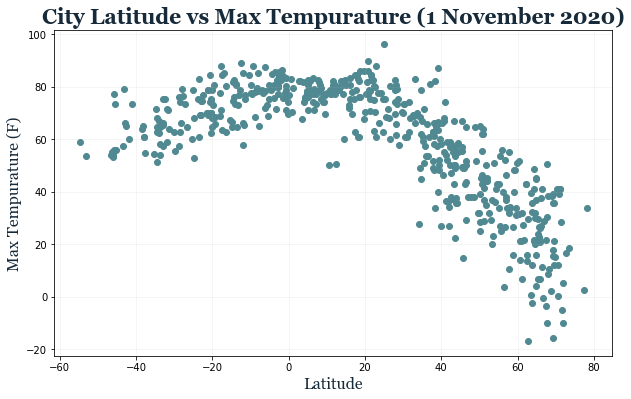

In [9]:
plt.figure(figsize=(10,6))

plt.scatter(city_df["Lat"], city_df["Max_Temp"], color="#508991",marker="o")

plt.title("City Latitude vs Max Tempurature (1 November 2020)", fontsize=21,fontweight='bold',fontname="Georgia",color="#172A3A")
plt.xlabel("Latitude", fontsize=16,fontname="Georgia",color="#172A3A")
plt.ylabel("Max Tempurature (F)", fontsize=16,fontname="Georgia",color="#172A3A")
plt.grid(alpha=.15)
plt.savefig('City Latitude vs Temp.png')
plt.show()

This chart is analyzing the relationship between the a said cities latitude and what their current max tempurature is.

## Latitude vs. Humidity Plot

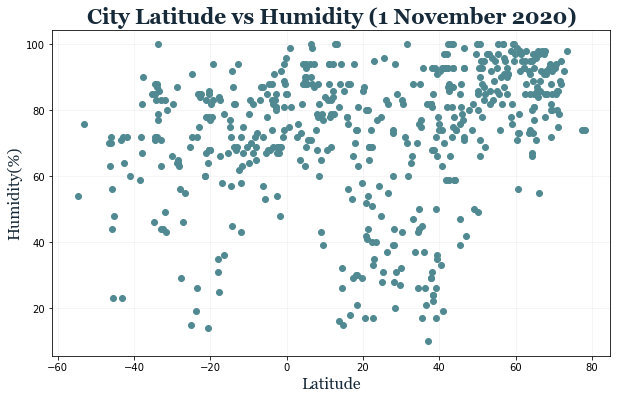

In [10]:
plt.figure(figsize=(10,6))

plt.scatter(city_df["Lat"], city_df["Humidity"], color="#508991",marker="o")

plt.title("City Latitude vs Humidity (1 November 2020)", fontsize=21,fontweight='bold',fontname="Georgia",color="#172A3A")
plt.xlabel("Latitude", fontsize=16,fontname="Georgia",color="#172A3A")
plt.ylabel("Humidity(%)", fontsize=16,fontname="Georgia",color="#172A3A")
plt.grid(alpha=.15)
plt.savefig('City Latitude vs Humidity.png')
plt.show()

This chart is analyzing the relationship between the a said cities latitude and what their current humidity percent is.

## Latitude vs. Cloudiness Plot

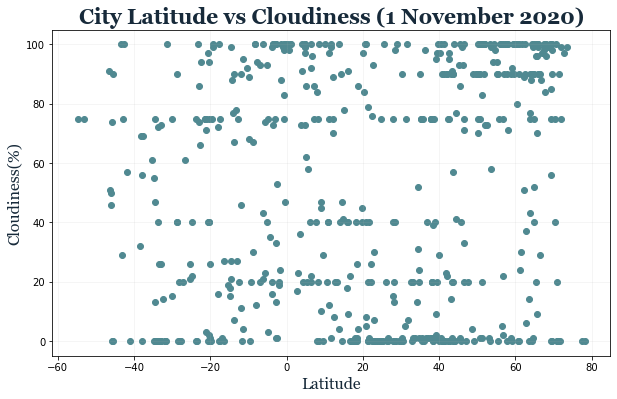

In [11]:
plt.figure(figsize=(10,6))

plt.scatter(city_df["Lat"], city_df["Cloudiness"], color="#508991",marker="o")

plt.title("City Latitude vs Cloudiness (1 November 2020)", fontsize=21,fontweight='bold',fontname="Georgia",color="#172A3A")
plt.xlabel("Latitude", fontsize=16,fontname="Georgia",color="#172A3A")
plt.ylabel("Cloudiness(%)", fontsize=16,fontname="Georgia",color="#172A3A")
plt.grid(alpha=.15)
plt.savefig('City Latitude vs Cloudiness.png')
plt.show()

This chart is analyzing the relationship between the a said cities latitude and what their current cloud coverage percent is.

## Latitude vs. Wind Speed Plot

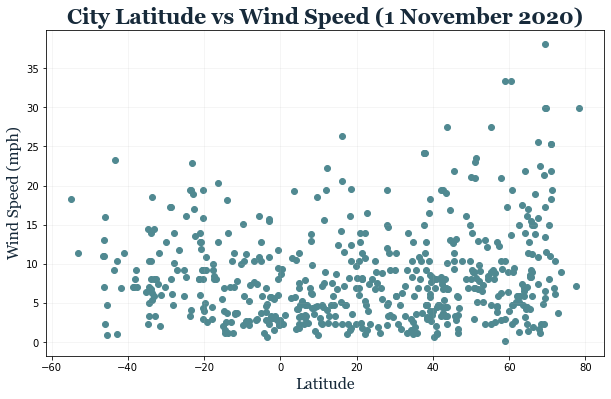

In [12]:
plt.figure(figsize=(10,6))

plt.scatter(city_df["Lat"], city_df["Wind_Speed"], color="#508991",marker="o")

plt.title("City Latitude vs Wind Speed (1 November 2020)", fontsize=21,fontweight='bold',fontname="Georgia",color="#172A3A")
plt.xlabel("Latitude", fontsize=16,fontname="Georgia",color="#172A3A")
plt.ylabel("Wind Speed (mph)", fontsize=16,fontname="Georgia",color="#172A3A")
plt.grid(alpha=.15)
plt.savefig('City Latitude vs Wind Speed.png')
plt.show()

This chart is analyzing the relationship between the a said cities latitude and what their current wind speed is.

## Linear Regression

In [13]:
n_df=city_df.loc[city_df["Lat"]>=0]
n_df.head()

,City,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind_Speed,Country,Date
0,cherskiy,68.75,161.30,2.17,93,99,4.90,RU,11-01-2020 46:23
1,chokurdakh,70.63,147.92,0.21,94,100,10.96,RU,11-01-2020 46:24
4,jamestown,42.10,-79.24,34.00,97,90,19.46,US,11-01-2020 46:27
6,taksimo,56.34,114.88,3.69,82,5,2.57,RU,11-01-2020 46:30
7,albany,42.60,-73.97,46.99,86,97,6.76,US,11-01-2020 46:31


In [14]:
s_df=city_df.loc[city_df["Lat"]<0]

s_df.head()

,City,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind_Speed,Country,Date
2,punta arenas,-53.15,-70.92,53.60,76,75,11.41,CL,11-01-2020 46:25
3,atuona,-9.80,-139.03,77.47,79,68,15.12,PF,11-01-2020 46:26
5,mar del plata,-38.00,-57.56,60.80,67,0,8.05,AR,11-01-2020 46:28
8,ushuaia,-54.80,-68.30,59.00,54,75,18.34,AR,11-01-2020 46:32
12,morondava,-20.28,44.28,74.75,85,2,3.00,MG,11-01-2020 46:39


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [15]:
x_values = n_df['Lat']
y_values = n_df['Max_Temp']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
# Create line equation string

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = -0.98x +91.5


The r-value is: 0.7209090904697057


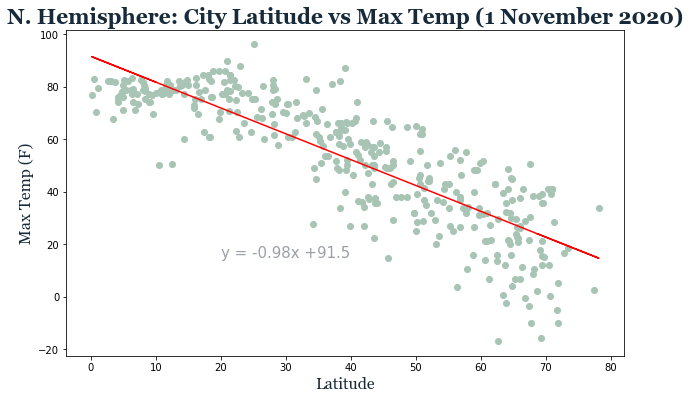

In [16]:
plt.figure(figsize=(10,6))


# Create Plot
plt.scatter(x_values,y_values,color="#A7C4B5",marker="o")
plt.plot(x_values,regress_values,"r-")

plt.title("N. Hemisphere: City Latitude vs Max Temp (1 November 2020)", fontsize=21,fontweight='bold',fontname="Georgia",color="#172A3A")
plt.xlabel("Latitude", fontsize=16,fontname="Georgia",color="#172A3A")
plt.ylabel("Max Temp (F)", fontsize=16,fontname="Georgia",color="#172A3A")
plt.annotate(line_eq,(20,15),fontsize=15,color="#9AA0A8")

print(f"The r-value is: {rvalue**2}")
plt.savefig('N. Hemisphere: City Latitude vs Max Temp.png')
plt.show()

The analysis above shows that currently, the lower the cities latitude is, the higher the max daily tempurature is. 

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [17]:
x_values = s_df['Lat']
y_values = s_df['Max_Temp']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
# Create line equation string

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = 0.46x +80.98


The r-value is: 0.4516770068904551


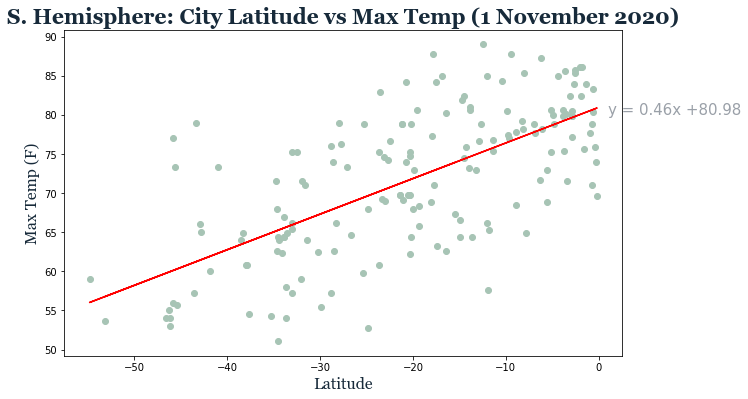

In [18]:
plt.figure(figsize=(10,6))


# Create Plot
plt.scatter(x_values,y_values,color="#A7C4B5",marker="o")
plt.plot(x_values,regress_values,"r-")

plt.title("S. Hemisphere: City Latitude vs Max Temp (1 November 2020)", fontsize=21,fontweight='bold',fontname="Georgia",color="#172A3A")
plt.xlabel("Latitude", fontsize=16,fontname="Georgia",color="#172A3A")
plt.ylabel("Max Temp (F)", fontsize=16,fontname="Georgia",color="#172A3A")
plt.annotate(line_eq,(1,80),fontsize=15,color="#9AA0A8")

print(f"The r-value is: {rvalue**2}")
plt.savefig('s. Hemisphere: City Latitude vs Max Temp.png')
plt.show()

The analysis above shows that currently, the less negative the cities latitude is, the higher the max daily tempurature is. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [19]:
x_values = n_df['Lat']
y_values = n_df['Humidity']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
# Create line equation string

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = 0.32x +62.11


The r-value is: 0.09090026349502651


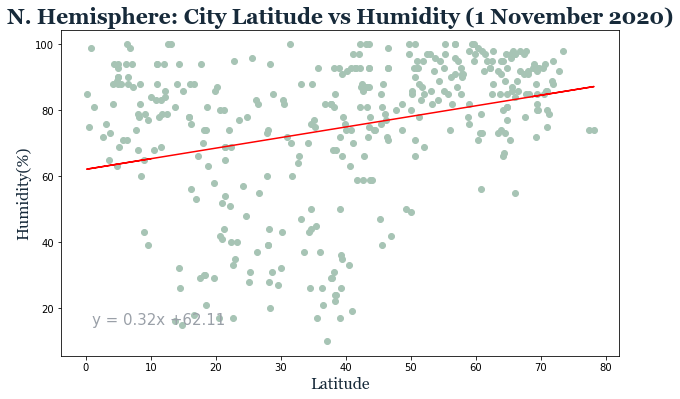

In [20]:
plt.figure(figsize=(10,6))


# Create Plot
plt.scatter(x_values,y_values,color="#A7C4B5",marker="o")
plt.plot(x_values,regress_values,"r-")

plt.title("N. Hemisphere: City Latitude vs Humidity (1 November 2020)", fontsize=21,fontweight='bold',fontname="Georgia",color="#172A3A")
plt.xlabel("Latitude", fontsize=16,fontname="Georgia",color="#172A3A")
plt.ylabel("Humidity(%)", fontsize=16,fontname="Georgia",color="#172A3A")
plt.annotate(line_eq,(1,15),fontsize=15,color="#9AA0A8")

print(f"The r-value is: {rvalue**2}")
plt.savefig('N. Hemisphere: City Latitude vs Humidity.png')
plt.show()

The analysis above shows that currently, the larger the cities latitude is, the higher the humidity is. 

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [21]:
x_values = s_df['Lat']
y_values = s_df['Humidity']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
# Create line equation string

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = 0.29x +75.47


The r-value is: 0.05259710483250854


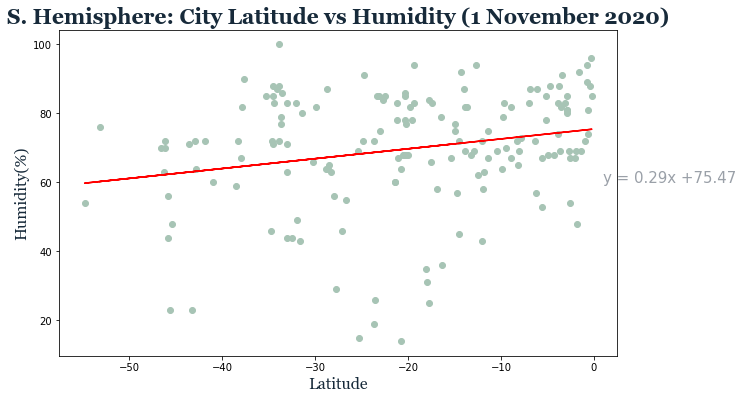

In [22]:
plt.figure(figsize=(10,6))


# Create Plot
plt.scatter(x_values,y_values,color="#A7C4B5",marker="o")
plt.plot(x_values,regress_values,"r-")

plt.title("S. Hemisphere: City Latitude vs Humidity (1 November 2020)", fontsize=21,fontweight='bold',fontname="Georgia",color="#172A3A")
plt.xlabel("Latitude", fontsize=16,fontname="Georgia",color="#172A3A")
plt.ylabel("Humidity(%)", fontsize=16,fontname="Georgia",color="#172A3A")
plt.annotate(line_eq,(1,60),fontsize=15,color="#9AA0A8")

print(f"The r-value is: {rvalue**2}")
plt.savefig('S. Hemisphere: City Latitude vs Humidity.png')
plt.show()

The analysis above shows that currently, the less negative the cities latitude is, the higher the humidity is. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [23]:
x_values = n_df['Lat']
y_values = n_df['Cloudiness']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
# Create line equation string

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = 0.4x +36.42


The r-value is: 0.04069691694620506


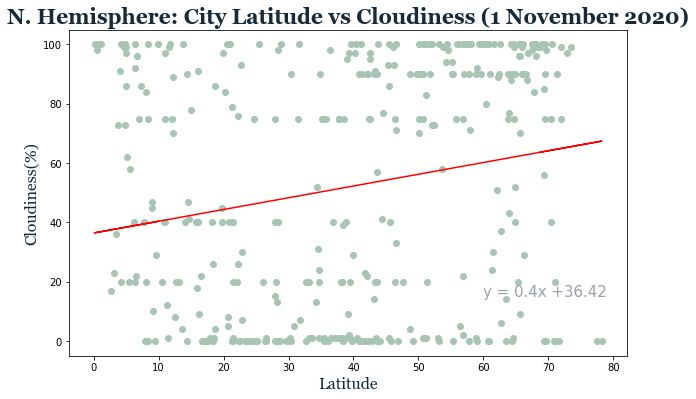

In [24]:
plt.figure(figsize=(10,6))


# Create Plot
plt.scatter(x_values,y_values,color="#A7C4B5",marker="o")
plt.plot(x_values,regress_values,"r-")

plt.title("N. Hemisphere: City Latitude vs Cloudiness (1 November 2020)", fontsize=21,fontweight='bold',fontname="Georgia",color="#172A3A")
plt.xlabel("Latitude", fontsize=16,fontname="Georgia",color="#172A3A")
plt.ylabel("Cloudiness(%)", fontsize=16,fontname="Georgia",color="#172A3A")
plt.annotate(line_eq,(60,15),fontsize=15,color="#9AA0A8")

print(f"The r-value is: {rvalue**2}")
plt.savefig('N. Hemisphere: City Latitude vs Cloudiness.png')

plt.show()

The analysis above shows that currently, the larger the cities latitude is, the cloudier it is. 

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [25]:
x_values = s_df['Lat']
y_values = s_df['Cloudiness']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
# Create line equation string

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = 0.46x +57.02


The r-value is: 0.02885711389056184


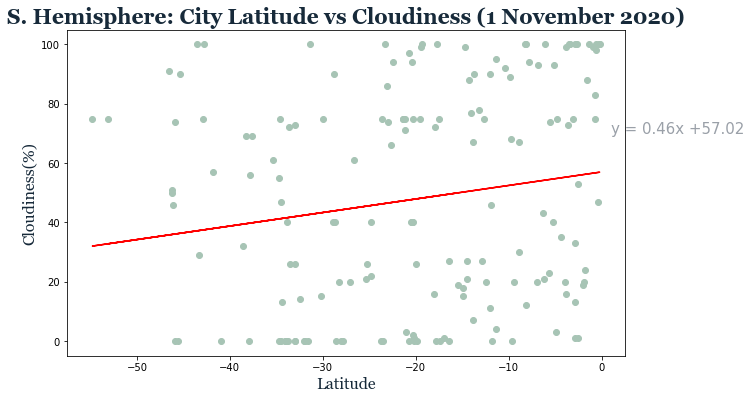

In [26]:
plt.figure(figsize=(10,6))


# Create Plot
plt.scatter(x_values,y_values,color="#A7C4B5",marker="o")
plt.plot(x_values,regress_values,"r-")

plt.title("S. Hemisphere: City Latitude vs Cloudiness (1 November 2020)", fontsize=21,fontweight='bold',fontname="Georgia",color="#172A3A")
plt.xlabel("Latitude", fontsize=16,fontname="Georgia",color="#172A3A")
plt.ylabel("Cloudiness(%)", fontsize=16,fontname="Georgia",color="#172A3A")
plt.annotate(line_eq,(1,70),fontsize=15,color="#9AA0A8")

print(f"The r-value is: {rvalue**2}")
plt.savefig('S. Hemisphere: City Latitude vs Cloudiness.png')

plt.show()

The analysis above shows that currently, the larger the cities latitude is, the cloudier it is. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [27]:
x_values = n_df['Lat']
y_values = n_df['Wind_Speed']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
# Create line equation string

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = 0.08x +5.53


The r-value is: 0.06462206633263382


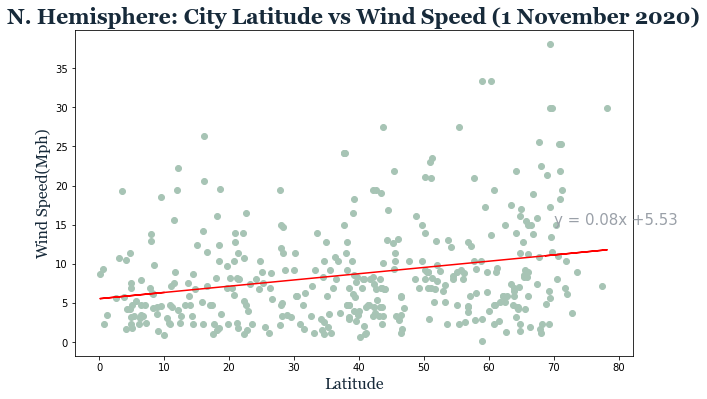

In [28]:
plt.figure(figsize=(10,6))


# Create Plot
plt.scatter(x_values,y_values,color="#A7C4B5",marker="o")
plt.plot(x_values,regress_values,"r-")

plt.title("N. Hemisphere: City Latitude vs Wind Speed (1 November 2020)", fontsize=21,fontweight='bold',fontname="Georgia",color="#172A3A")
plt.xlabel("Latitude", fontsize=16,fontname="Georgia",color="#172A3A")
plt.ylabel("Wind Speed(Mph)", fontsize=16,fontname="Georgia",color="#172A3A")
plt.annotate(line_eq,(70,15),fontsize=15,color="#9AA0A8")

print(f"The r-value is: {rvalue**2}")
plt.savefig('N. Hemisphere: City Latitude vs wind.png')

plt.show()

The analysis above shows that cities with a more positive latitude have higher wind speeds.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [29]:
x_values = s_df['Lat']
y_values = s_df['Wind_Speed']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
# Create line equation string

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = -0.1x +6.2


The r-value is: 0.06725216117513058


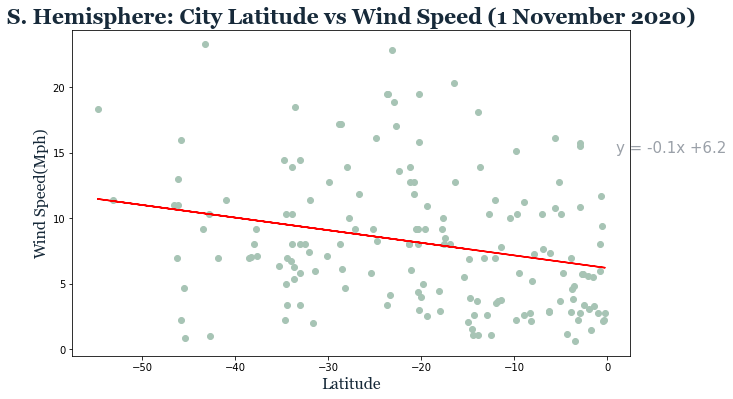

In [30]:
plt.figure(figsize=(10,6))


# Create Plot
plt.scatter(x_values,y_values,color="#A7C4B5",marker="o")
plt.plot(x_values,regress_values,"r-")

plt.title("S. Hemisphere: City Latitude vs Wind Speed (1 November 2020)", fontsize=21,fontweight='bold',fontname="Georgia",color="#172A3A")
plt.xlabel("Latitude", fontsize=16,fontname="Georgia",color="#172A3A")
plt.ylabel("Wind Speed(Mph)", fontsize=16,fontname="Georgia",color="#172A3A")
plt.annotate(line_eq,(1,15),fontsize=15,color="#9AA0A8")

print(f"The r-value is: {rvalue**2}")
plt.savefig('S. Hemisphere: City Latitude vs wind.png')

plt.show()

The analysis above shows that cities with a more negative latitude have higher wind speeds.